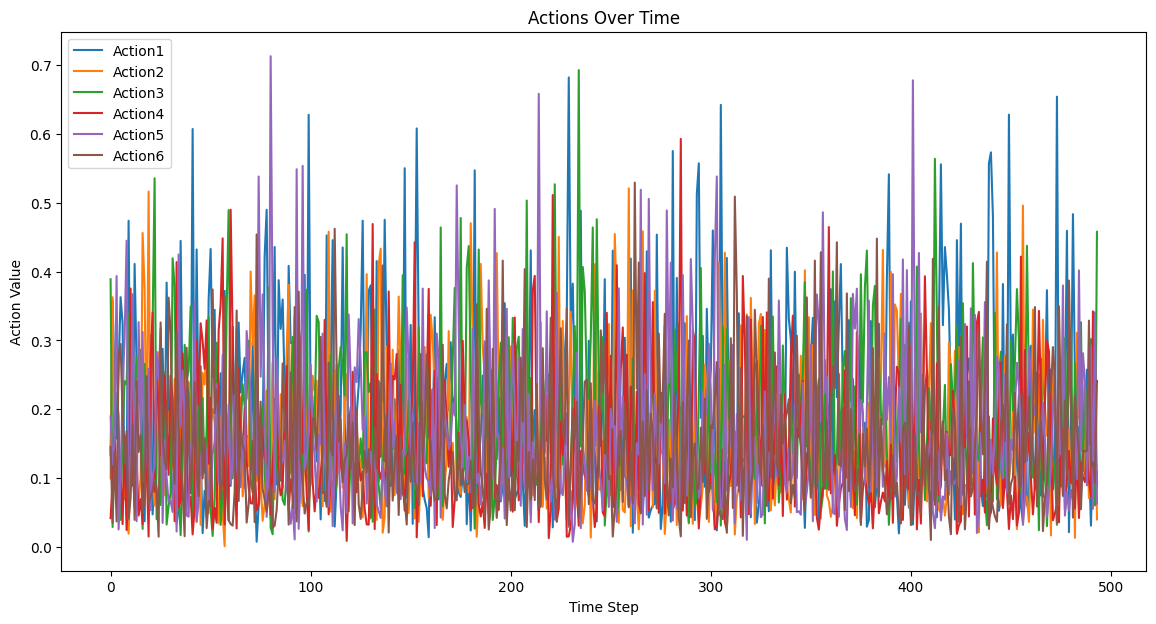

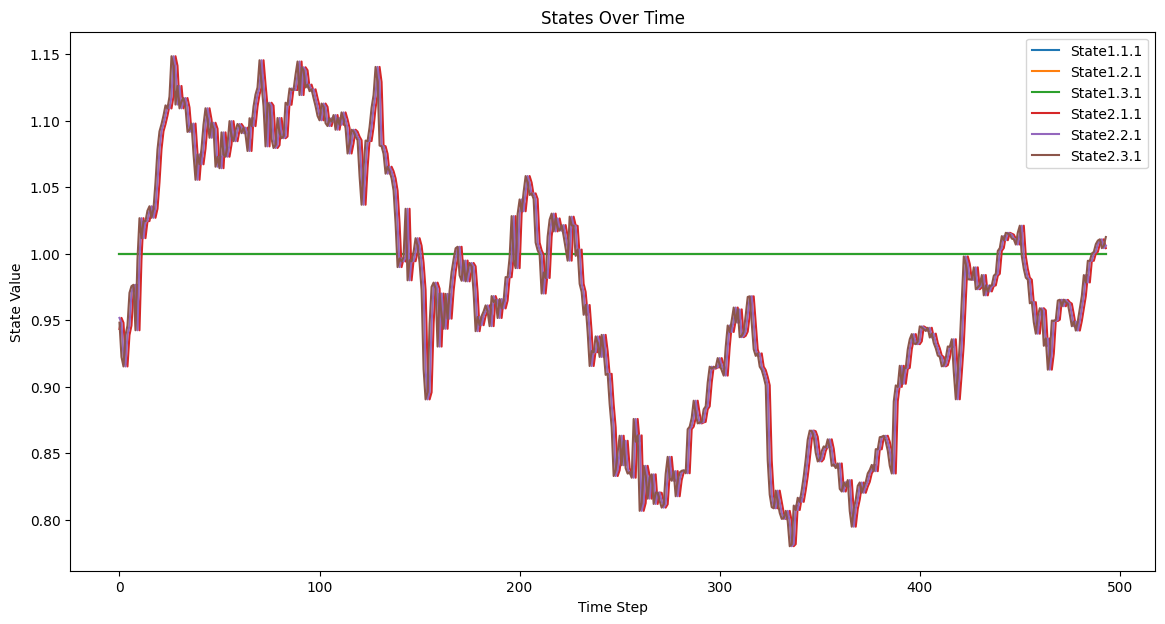

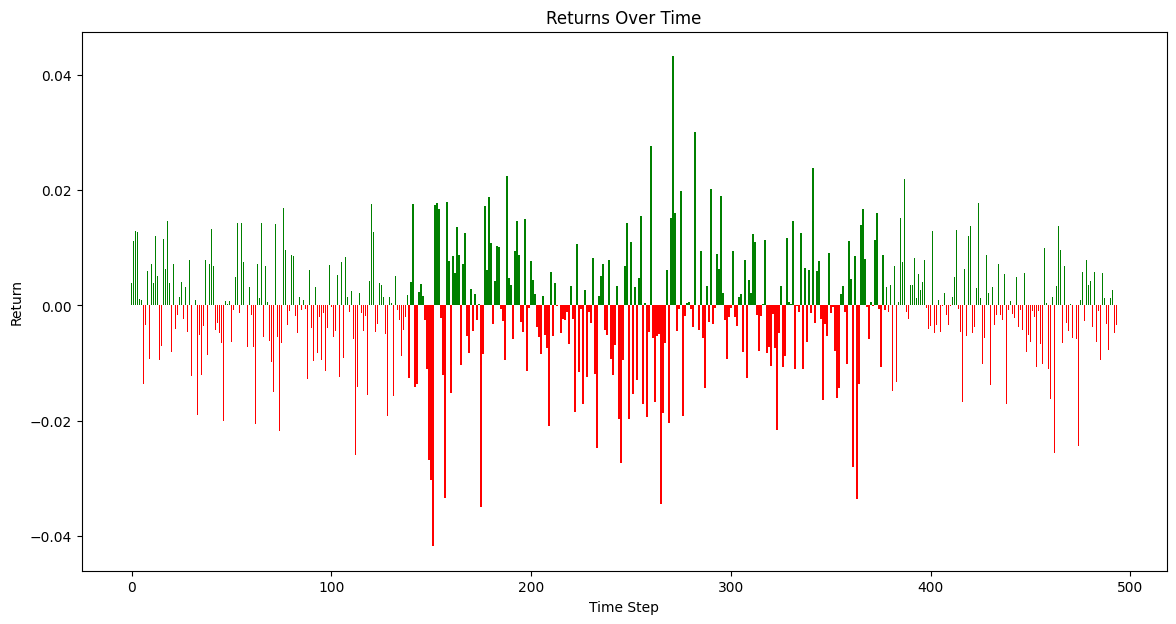

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_data(merged_file_path):
    # Load the merged CSV file
    merged_df = pd.read_csv(merged_file_path)

    # Extract action columns
    action_columns = [col for col in merged_df.columns if col.startswith('Action')]

    # Plot the actions over time
    plt.figure(figsize=(14, 7))
    for action in action_columns:
        plt.plot(merged_df[action], label=action)
    plt.title('Actions Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Action Value')
    plt.legend()
    plt.show()

    # Extract state columns
    state_columns = [col for col in merged_df.columns if col.startswith('State')]

    # Plot the states over time (for simplicity, we'll plot the first few states)
    plt.figure(figsize=(14, 7))
    for state in state_columns[:6]:  # Plotting the first six states
        plt.plot(merged_df[state], label=state)
    plt.title('States Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('State Value')
    plt.legend()
    plt.show()

    returns = merged_df['Return']

    # Waterfall chart of returns over time
    def plot_waterfall(data, title):
        fig, ax = plt.subplots(figsize=(14, 7))
        ax.bar(range(len(data)), data, color=(data > 0).map({True: 'g', False: 'r'}))
        ax.set_title(title)
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Return')
        plt.show()

    plot_waterfall(returns, 'Returns Over Time')

# Example usage
merged_file_path = 'state_action_results.csv'
visualize_data(merged_file_path)


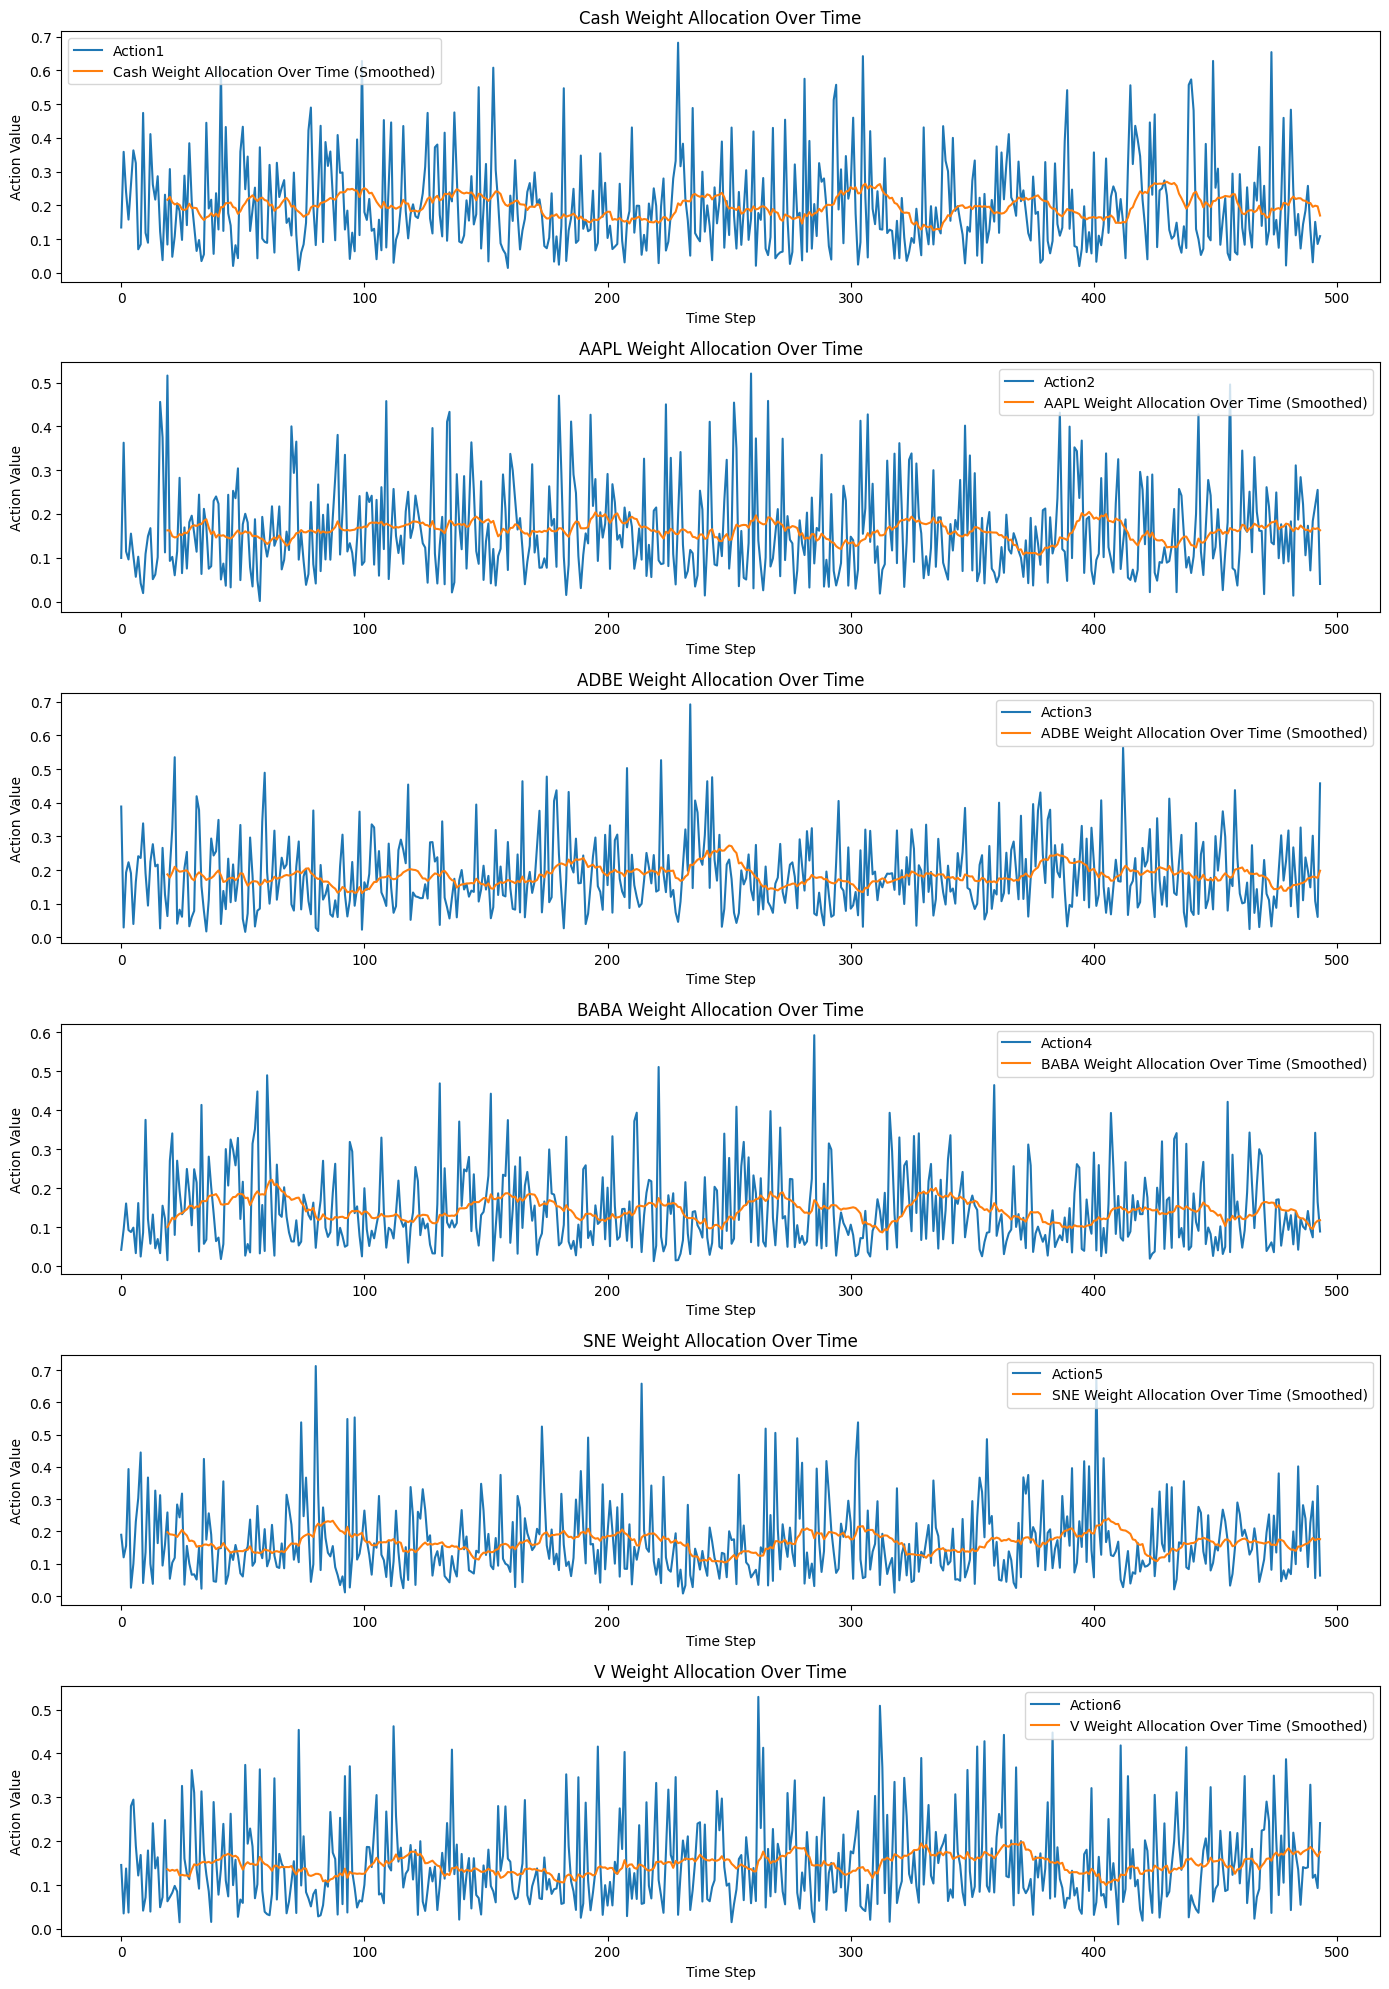

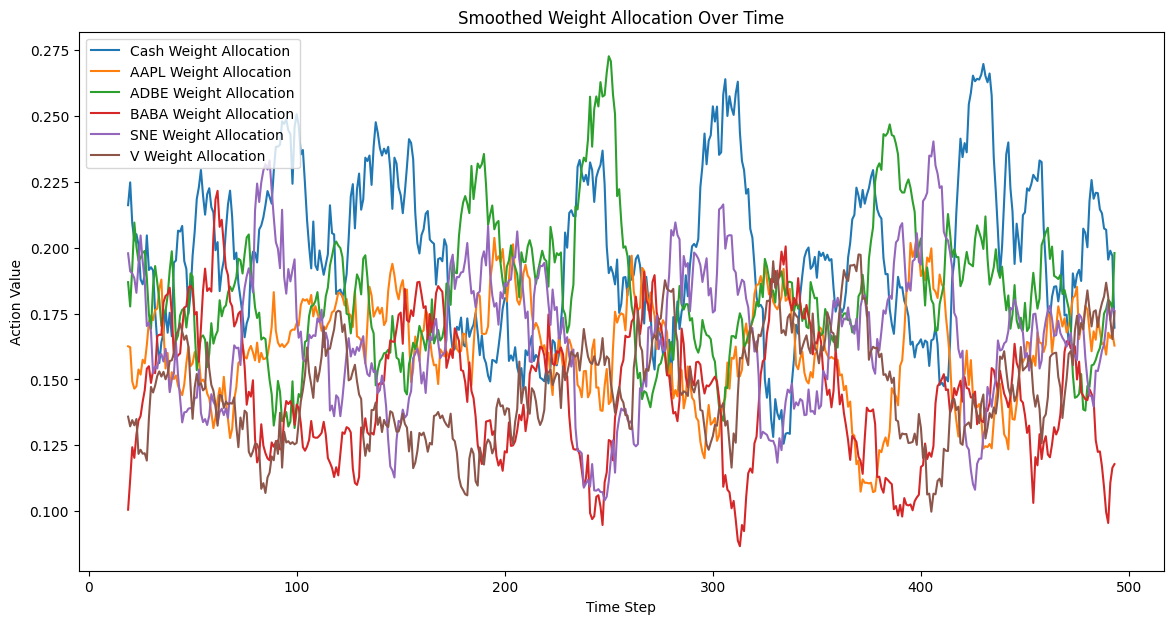

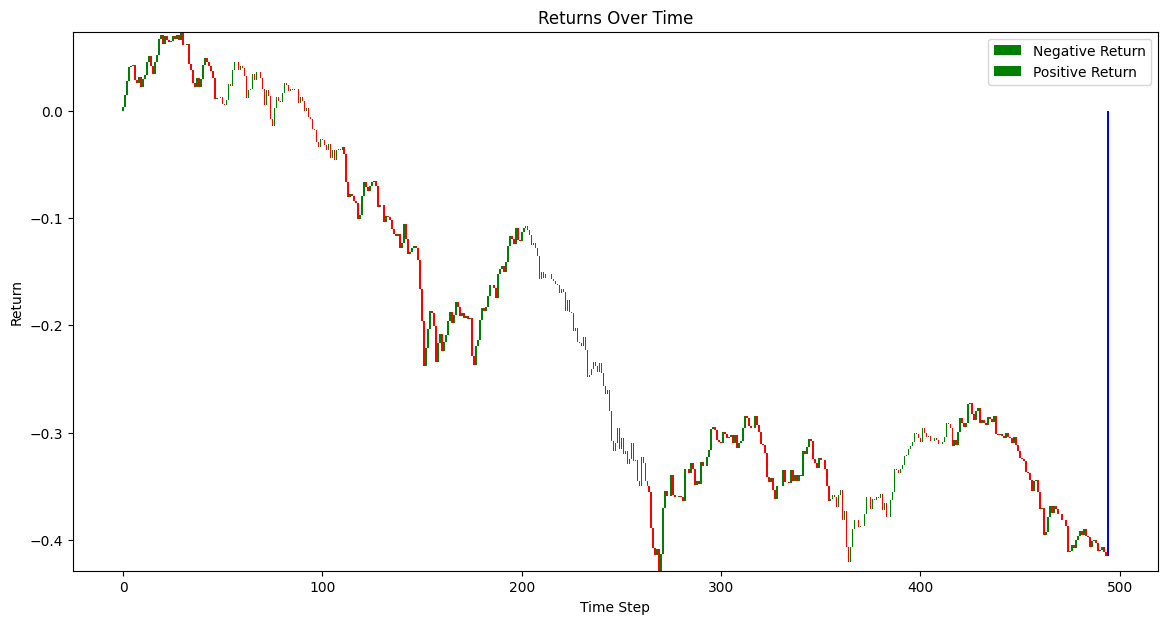

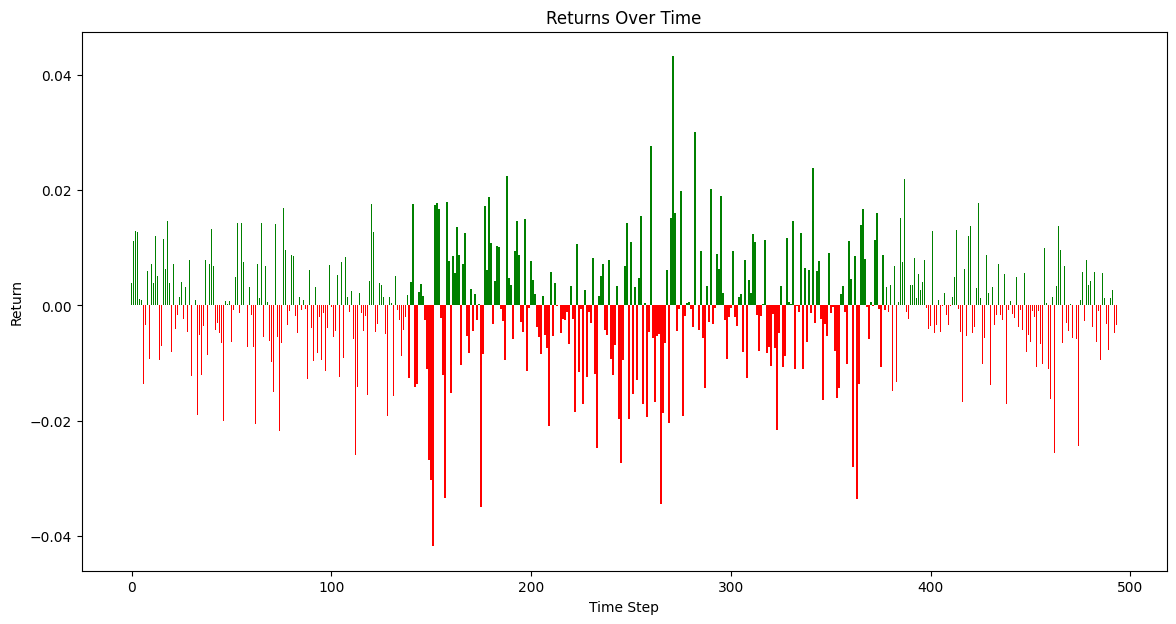

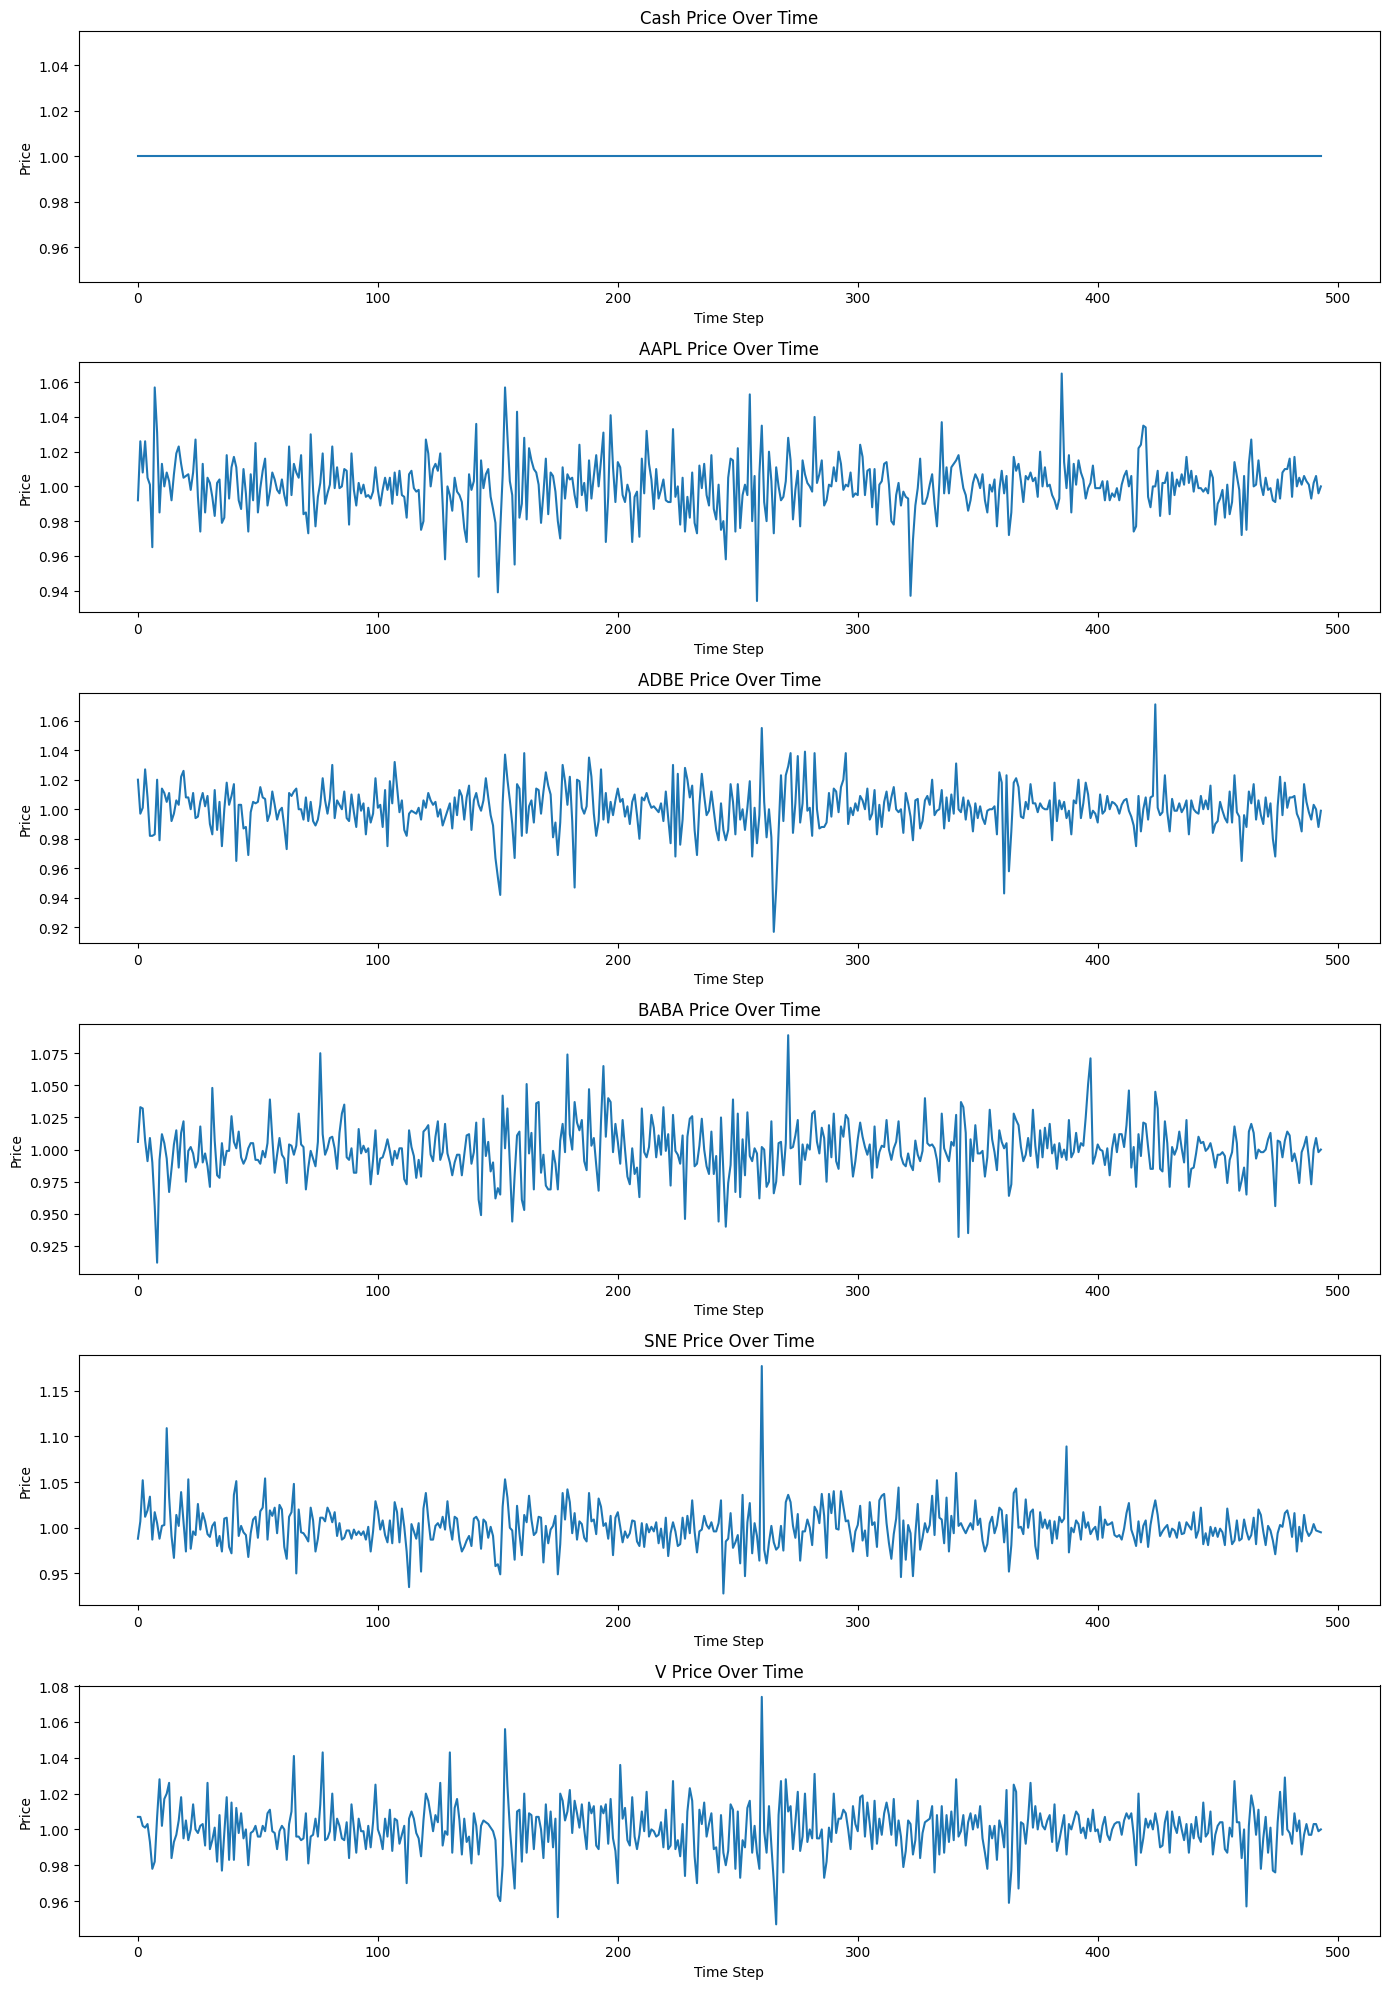

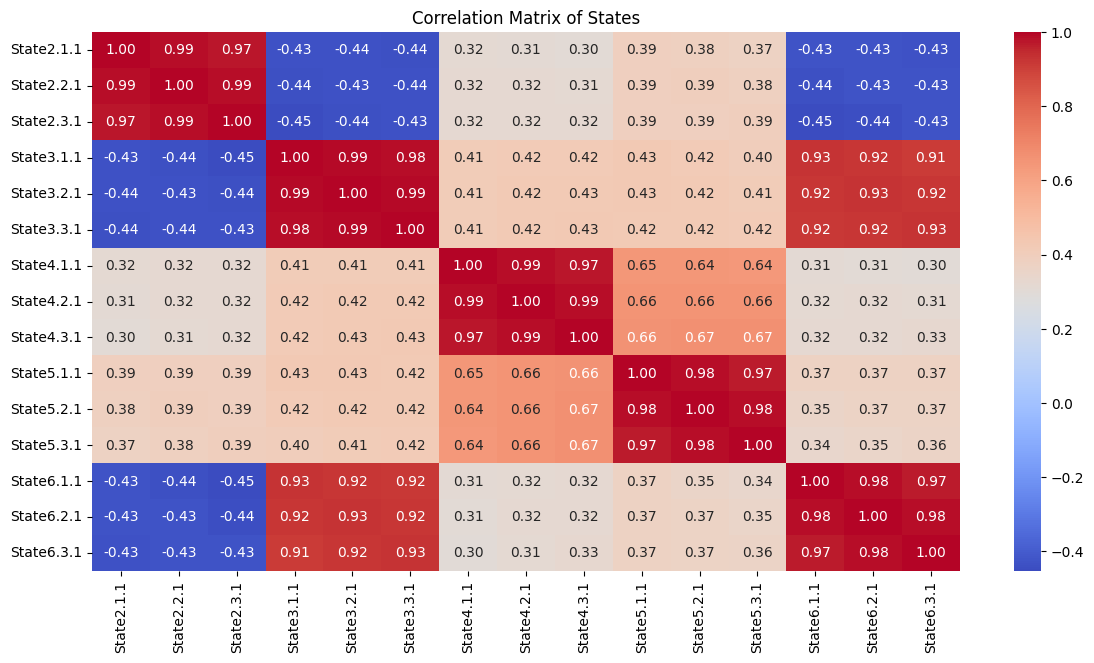

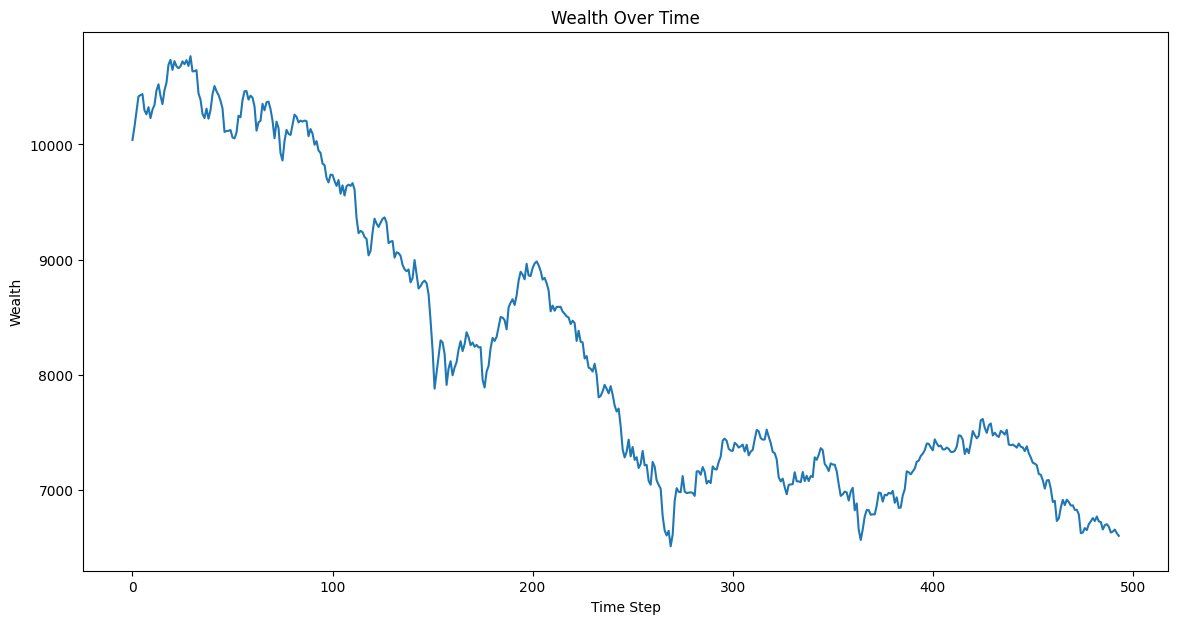

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

def save_plt_as_png(plt, file_path):
    plt.savefig(file_path)
    plt.close()

def plot_action_over_time(df, action_columns,config_file):
    # Load the config file
    config = json.load(open(config_file, 'r'))

    # Read the asset names from the config file
    asset_names = config['session']['codes']
    # Add cash to the asset names (1st asset)
    asset_names = ['Cash'] + asset_names

    # Plot the action and a smoothed version of each action over time in subplots
    fig, axs = plt.subplots(len(action_columns), 1, figsize=(14, 20))
    for i, action in enumerate(action_columns):
        axs[i].plot(df[action], label=action)
        axs[i].plot(df[action].rolling(window=20).mean(), label=f'{asset_names[i]} Weight Allocation Over Time (Smoothed)')
        axs[i].set_title(f'{asset_names[i]} Weight Allocation Over Time')
        axs[i].set_xlabel('Time Step')
        axs[i].set_ylabel('Action Value')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

    save_plt_as_png(plt, 'plots\Action_over_time.png')

    # Plot all smoothed actions together
    fig, ax = plt.subplots(figsize=(14, 7))
    for i, action in enumerate(action_columns):
        ax.plot(df[action].rolling(window=20).mean(), label=f'{asset_names[i]} Weight Allocation')
    ax.set_title('Smoothed Weight Allocation Over Time')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Action Value')
    ax.legend()
    plt.show()

    save_plt_as_png(plt, 'plots\smoothed_actions.png')


def plot_waterfall(data, title):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create a list of colors based on the value change
    colors = ['green' if x > 0 else 'red' for x in data]
    
    # Calculate the cumulative sum
    cumulative = data.cumsum()
    
    # Plot the initial bar (baseline)
    ax.bar(0, data.iloc[0], color=colors[0])
    
    # Plot the remaining bars with the cumulative baseline
    for i in range(1, len(data)):
        ax.bar(i, data.iloc[i], bottom=cumulative.iloc[i-1], color=colors[i])
    
    # Plot the total bar
    ax.bar(len(data), cumulative.iloc[-1], color='blue')
    
    ax.set_title(title)
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Return')
    # Legend with Negative red and Positive green
    ax.legend(['Negative Return', 'Positive Return'], loc='upper right')
    plt.show()

    save_plt_as_png(plt, 'plots\waterfallCum.png')

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(range(len(data)), data, color=(data > 0).map({True: 'g', False: 'r'}))
    ax.set_title(title)
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Return')
    plt.show()

    save_plt_as_png(plt, 'plots\waterfall.png')

def plot_asset_prices(df, price_columns,config_file):
    # Load the config file
    config = json.load(open(config_file, 'r'))

    # Read the asset names from the config file
    asset_names = config['session']['codes']
    # Add cash to the asset names (1st asset)
    asset_names = ['Cash'] + asset_names

    # Plot the price of each asset over time in a different subplot
    fig, axs = plt.subplots(len(price_columns), 1, figsize=(14,20))
    for i, price in enumerate(price_columns):
        axs[i].plot(df[price])
        axs[i].set_title(f'{asset_names[i]} Price Over Time')
        axs[i].set_xlabel('Time Step')
        axs[i].set_ylabel('Price')
    plt.tight_layout()
    plt.show()

    save_plt_as_png(plt, 'plots\Asset_prices.png')

def plot_correlation_states(df, state_columns):
    # Correlation Matrix of States
    plt.figure(figsize=(14, 7))
    corr_matrix = df[state_columns].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix of States')
    plt.show()

    save_plt_as_png(plt, 'plots\correlation_states.png')

def plot_wealth(wealth, title):
    plt.figure(figsize=(14, 7))
    plt.plot(wealth)
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Wealth')
    plt.show()

    save_plt_as_png(plt, 'plots\wealth.png')


def visualize_data(merged_file_path):
    # Load the merged CSV file
    merged_df = pd.read_csv(merged_file_path)

    config_file = 'config.json'

    # Extract action columns
    action_columns = [col for col in merged_df.columns if col.startswith('Action')]
    # Plot the actions over time
    plot_action_over_time(merged_df, action_columns,config_file)

    # Waterfall chart of returns over time
    returns = merged_df['Return']
    plot_waterfall(returns, 'Returns Over Time')

    # Plot the Price of each asset over time
    price_columns = [col for col in merged_df.columns if col.startswith('Price')]
    plot_asset_prices(merged_df, price_columns, config_file)

    # Extract state columns
    state_columns = [col for col in merged_df.columns if col.startswith('State') and col.startswith('State1')!=True]
    # Plot the correlation matrix of the states
    plot_correlation_states(merged_df, state_columns)

    wealth = merged_df['Wealth']
    plot_wealth(wealth, 'Wealth Over Time')






# Example usage
merged_file_path = 'state_action_results.csv'
visualize_data(merged_file_path)
